### You can run this notebook at Colab by clicking here:

<a target="_blank" href="https://colab.research.google.com/github/NMRLipids/databank-template/blob/main/scripts/plotSimulation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

### Streamlit app is available in here: https://lolicato-nmrlipids-gui-app-qa2ffe.streamlit.app/¶

# Intialize NMRlipids databank

In [1]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
import urllib.request
import yaml
import random

if 'google.colab' in sys.modules:
  !pip3 install MDAnalysis
import MDAnalysis


# This defines the path for the NMRlipids databank on your computer. 
# Default is that this repository and the NMRlipids databank repository are cloned to the same folder.
# If this is not the case, change this to the folder where the NMRlipids databank repository is located.

databankPath =  '../../Databank/'

if 'google.colab' in sys.modules:
  !git clone https://github.com/NMRLipids/Databank.git
  databankPath = '/content/Databank'


# This enales the access to functions defined in the NMRlipids databank.
sys.path.insert(1, databankPath + '/Scripts/BuildDatabank/')
from databankLibrary import * 

# This initializes the databank and stores the information of all simulations into a list.
# Each list item contains the information from README.yaml file of the given simulation.
systems = initialize_databank(databankPath)

Databank initialized from the folder: /home/sosamuli/work/NMRlipids/Databank/Data/Simulations


# Print and plot basic properties of a system selected based on ID number 

system is now simulation with the ID: 761  

Membrane area per lipid: 60.2486385518259 

Membrane thickness: 4.348027770996095 

Relative equilibration time for each lipid in the simulation:
POPC: 25.762383882109376


Plot form factor and C-H bond order parameters from the simulation together with experimental data if avaible 

POPC
Databank initialized from the folder: /home/sosamuli/work/NMRlipids/Databank/Data/Simulations
DOI:  10.5281/zenodo.8299506
Form factor quality:  1.755000000000001


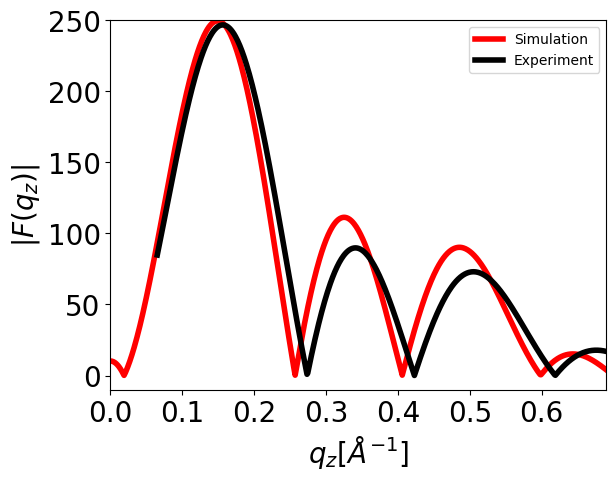

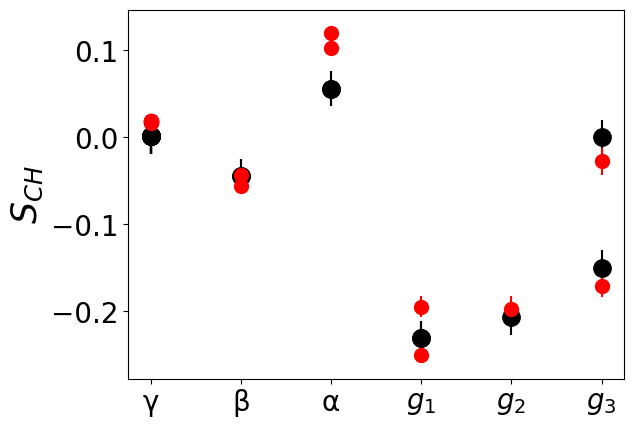

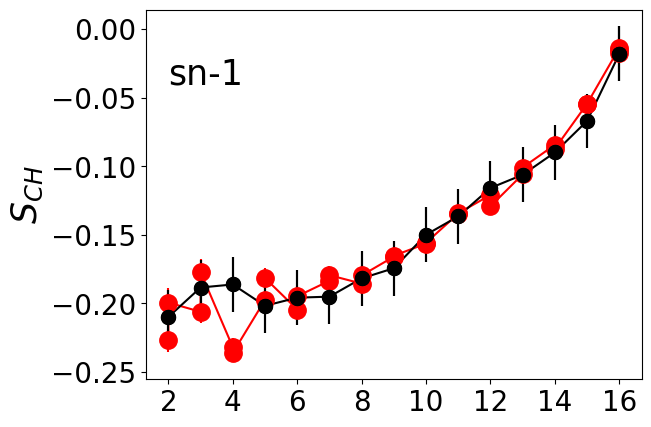

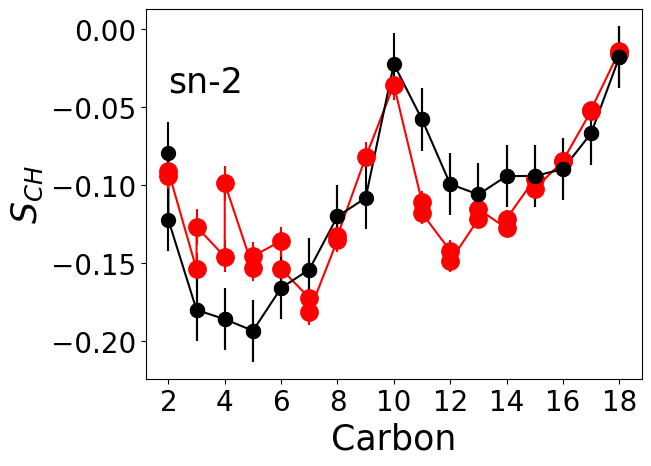

In [2]:
## Set the 'ID' number of the simulation under interest
ID = 761

## This loop is setting the 'system' correspond to the selected 'ID'
for system in systems:
    if system['ID'] == ID:
        print('system is now simulation with the ID:', ID, ' \n')
        break
    
## Average area per lipid for the selected simulation
APL = CalcAreaPerMolecule(system)
print('Membrane area per lipid:' , APL, '\n')

## Membrane thickness for the selected simulation
thickness = GetThickness(system)
print('Membrane thickness:' , thickness, '\n')

## Relative PCA equlibration time for the selected simulation
print('Relative equilibration time for each lipid in the simulation:')
ShowEquilibrationTimes(system)
print('\n')
    
## Plot form factor and C-H bond order parameters from the simulation together with experimental data if avaible
print('Plot form factor and C-H bond order parameters from the simulation together with experimental data if avaible \n')
for lipid in system['COMPOSITION']:
    if lipid not in lipids_dict:
        continue
    print(lipid)
    plotSimulation(system['ID'], lipid)

system is now simulation with the ID: 765  

Membrane area per lipid: 56.20198099044785 

Membrane thickness: 4.53679808807373 

Relative equilibration time for each lipid in the simulation:
SM16: 0.8005155370759699


Plot form factor and C-H bond order parameters from the simulation together with experimental data if avaible 

SM16
Databank initialized from the folder: /home/sosamuli/work/NMRlipids/Databank/Data/Simulations
DOI:  10.5281/zenodo.8338253
Form factor quality:  1.9999999999999962


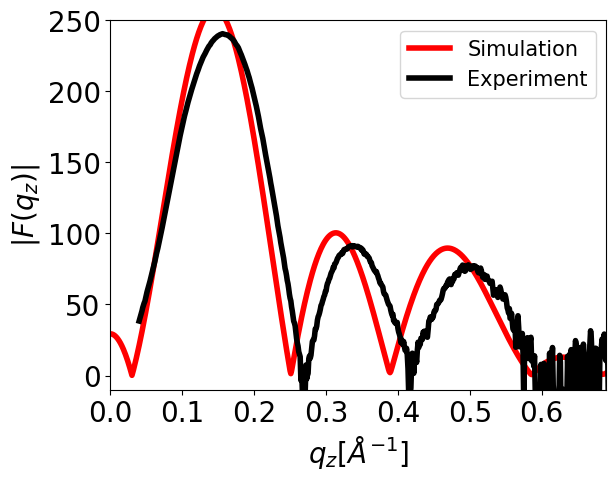

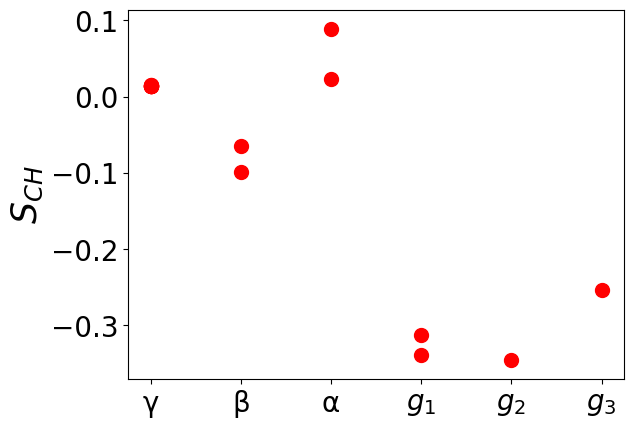

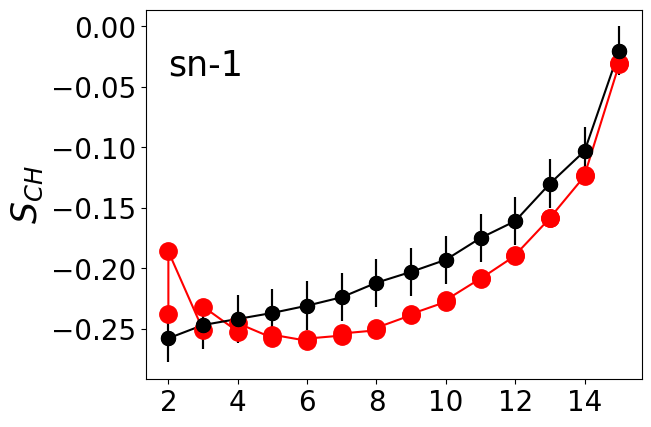

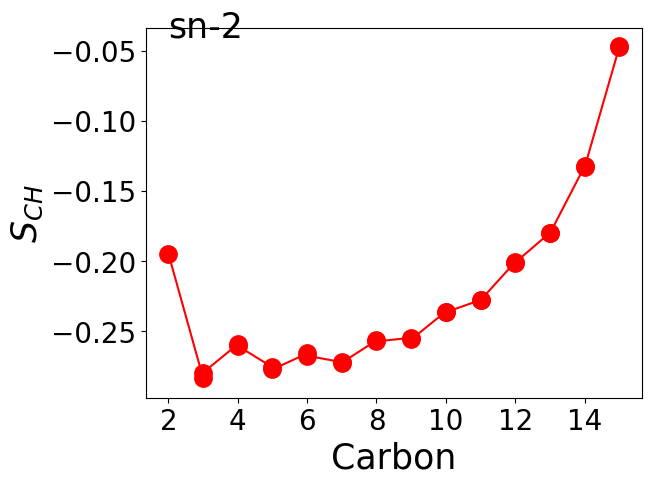

In [3]:
## Set the 'ID' number of the simulation under interest
ID = 765

## This loop is setting the 'system' correspond to the selected 'ID'
for system in systems:
    if system['ID'] == ID:
        print('system is now simulation with the ID:', ID, ' \n')
        break
    
## Average area per lipid for the selected simulation
APL = CalcAreaPerMolecule(system)
print('Membrane area per lipid:' , APL, '\n')

## Membrane thickness for the selected simulation
thickness = GetThickness(system)
print('Membrane thickness:' , thickness, '\n')

## Relative PCA equlibration time for the selected simulation
print('Relative equilibration time for each lipid in the simulation:')
ShowEquilibrationTimes(system)
print('\n')
    
## Plot form factor and C-H bond order parameters from the simulation together with experimental data if avaible
print('Plot form factor and C-H bond order parameters from the simulation together with experimental data if avaible \n')
for lipid in system['COMPOSITION']:
    if lipid not in lipids_dict:
        continue
    print(lipid)
    plotSimulation(system['ID'], lipid)